# Baza filmów

#### Zaimportowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#### Załadowanie danych

In [2]:
genres = 'tmdb_genres.csv'
movies = 'tmdb_movies.csv'
genres_df = pd.read_csv(genres)
movies_df = pd.read_csv(movies)

#### Przygotowanie danych

In [3]:
movies_df = movies_df.drop(columns=['Unnamed: 0', 'homepage', 'id', 'original_language', 'overview', 'popularity', 'status', 'tagline', 'original_title'])
genres_df = genres_df.rename(columns={'Unnamed: 0': 'genre_id'})
movies_df = movies_df.merge(genres_df, on='genre_id')
movies_df.drop(columns=['genre_id'], inplace=True)
movies_df

,budget,release_date,revenue,runtime,title,vote_average,vote_count,genres
0,237000000,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Action
1,300000000,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Adventure
2,245000000,2015-10-26,880674609,148.0,Spectre,6.3,4466,Action
3,250000000,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Action
4,260000000,2012-03-07,284139100,132.0,John Carter,6.1,2124,Action
...,...,...,...,...,...,...,...,...
4798,220000,1992-09-04,2040920,81.0,El Mariachi,6.6,238,Action
4799,9000,2011-12-26,0,85.0,Newlyweds,5.9,5,Comedy
4800,0,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6,Comedy
4801,0,2012-05-03,0,98.0,Shanghai Calling,5.7,7,NaN


#### Ćwiczenia:

Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [4]:
third_quartile = movies_df['vote_count'].quantile(0.75)

popular_movies = movies_df[movies_df['vote_count'] > third_quartile]

top_10_movies = popular_movies.sort_values(by='vote_average', ascending=False).head(10)

top_10_movies['title'].tolist()


['The Shawshank Redemption',
 'The Godfather',
 'Spirited Away',
 'Whiplash',
 'The Godfather: Part II',
 'Pulp Fiction',
 "Schindler's List",
 'Fight Club',
 'Psycho',
 'GoodFellas']

Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

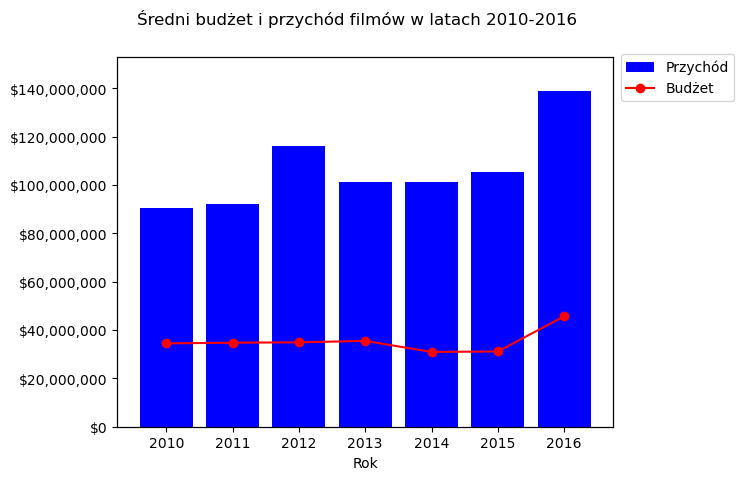

In [5]:
# Zmiana liczb na USD
def usd(x, pos):
    return '${:,.0f}'.format(x)

# Dodanie kolumny 'release_year' na podstawie kolumny 'release_date'
movies_df['release_year'] = pd.to_datetime(movies_df['release_date']).dt.year

# Wybór danych z lat 2010-2016
filtered_movies_df = movies_df[(movies_df['release_year'] >= 2010) & (movies_df['release_year'] <= 2016)]

# Wyliczenie średnich budżetu i przychodu
mean_budget_revenue_per_year = filtered_movies_df.groupby('release_year')[['budget', 'revenue']].mean()

# Stworzenie wykresu i osi
fig, ax1 = plt.subplots()

# Stworzenie drugiej osi
ax2 = ax1.twinx()

# Dodanie wykresu słupkowego dla średniego przychodu
ax1.bar(mean_budget_revenue_per_year.index, mean_budget_revenue_per_year['revenue'], color='b', label='Przychód')

# Dodanie wykresu liniowego dla średniego budżetu
ax2.plot(mean_budget_revenue_per_year.index, mean_budget_revenue_per_year['budget'], color='r', marker='o', label='Budżet')

# Dodanie etykiety dla osi y wykresu słupkowego
ax1.yaxis.set_major_formatter(plt.FuncFormatter(usd))

# Schowanie osi y dla drugiego wykresu
ax2.yaxis.set_visible(False)

# Dodanie etykiet dla osi x
ax1.set_xlabel('Rok')

# Określenie zakresu wartości na osi y
max_value = max(mean_budget_revenue_per_year['budget'].max(), mean_budget_revenue_per_year['revenue'].max())
ax1.set_ylim(0, max_value * 1.1)
ax2.set_ylim(0, max_value * 1.1)

# Dodanie tytułu
fig.suptitle('Średni budżet i przychód filmów w latach 2010-2016')

# Dodanie legendy
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9))

# Pokazanie wykresu
plt.show()



Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [6]:
most_frequent_genre = movies_df['genres'].mode()[0]

genre_count = movies_df[movies_df['genres'] == most_frequent_genre].shape[0]

most_frequent_genre, genre_count

('Drama', 1207)

Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [7]:
mean_runtime_per_genre = movies_df.groupby('genres')['runtime'].mean()

longest_runtime_genre = mean_runtime_per_genre.idxmax()
longest_runtime = mean_runtime_per_genre.max()

print(longest_runtime_genre, longest_runtime)

History 133.96


Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

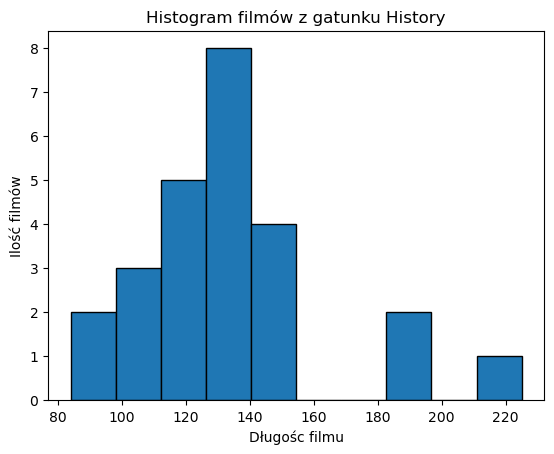

In [8]:
longest_films = movies_df[movies_df['genres'] == longest_runtime_genre]

plt.hist(longest_films['runtime'], bins=10, edgecolor='black')

plt.xlabel('Długośc filmu')
plt.ylabel('Ilość filmów')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title(f'Histogram filmów z gatunku {longest_runtime_genre}')

plt.show()